# Lab 4 - Hypothesis testing and statistical analysis

## Get the data (1 mark)

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('census11sample.csv')
# Set the first column as the index
df = df.set_index(df.columns[0])
# Remove the name of the index column
df.index.name = None

## Divide the data (2 marks)

In [53]:
# Split the data into two parts, one for exploration and one for testing the hypothesis
# sample_explore contains 80% (800 rows) of the data, whereas sample_test contains 20% (200 rows)
sample_explore = df.sample(frac=0.8, random_state=42)
sample_test = df.drop(sample_explore.index)

## Explore the data (5 marks)

       North East  North West  Yorkshire and The Humber  East Midlands  \
count   800.00000  800.000000                800.000000     800.000000   
mean     40.51250   39.508750                 38.651250      38.982500   
std      23.00133   22.790221                 22.791313      23.531082   
min       0.00000    0.000000                  0.000000       0.000000   
25%      22.00000   19.000000                 20.000000      18.000000   
50%      41.00000   40.000000                 38.000000      38.000000   
75%      58.00000   57.000000                 56.000000      58.000000   
max      94.00000   99.000000                100.000000      90.000000   

       West Midlands  East of England      London  South East  South West  
count     800.000000       800.000000  800.000000  800.000000  800.000000  
mean       40.057500        41.011250   35.663750   39.160000   42.775000  
std        23.594758        23.557532   22.031964   23.033836   24.492432  
min         0.000000         

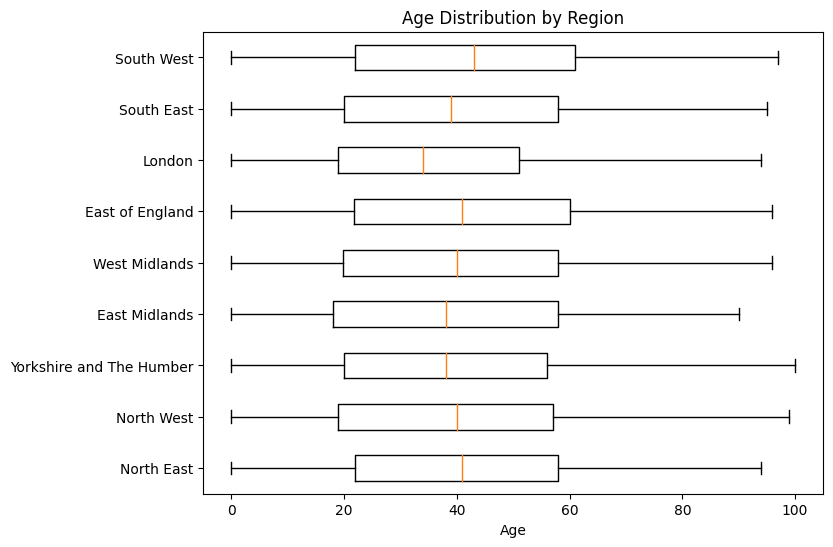

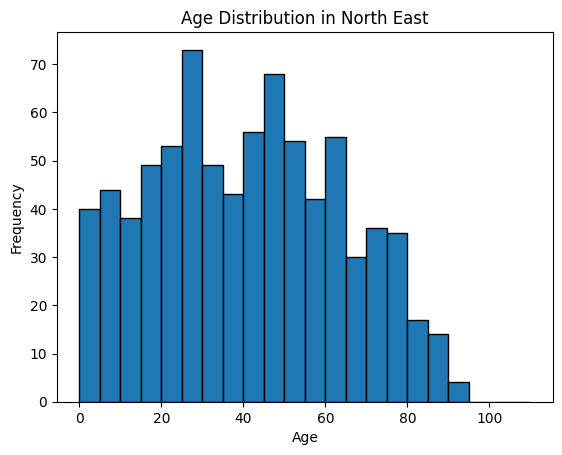

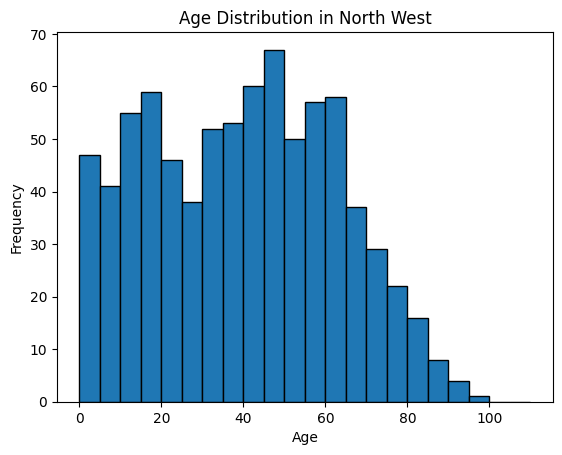

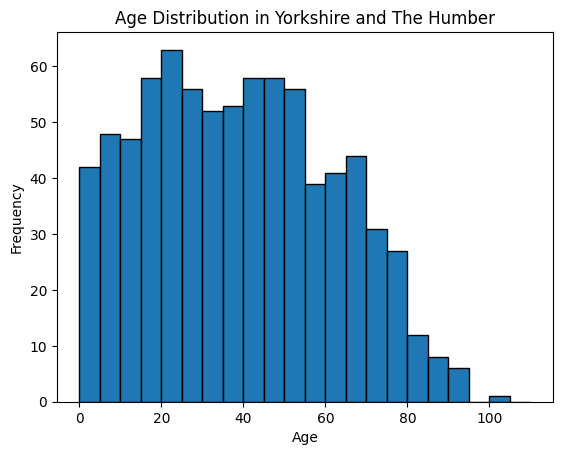

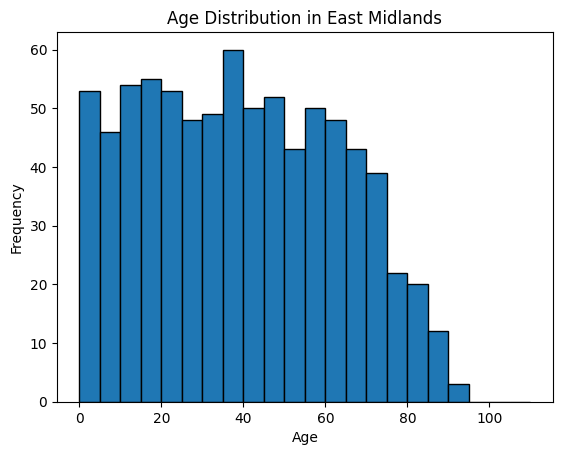

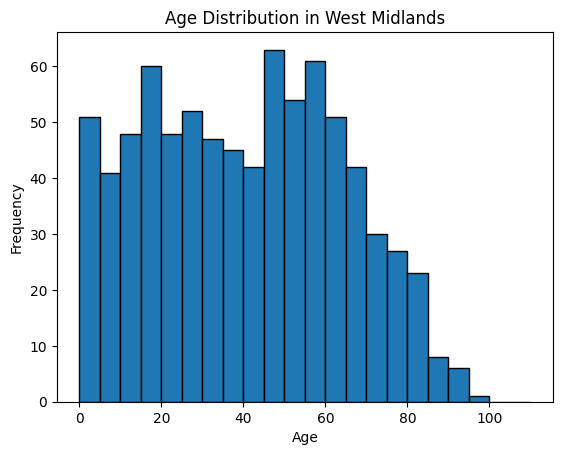

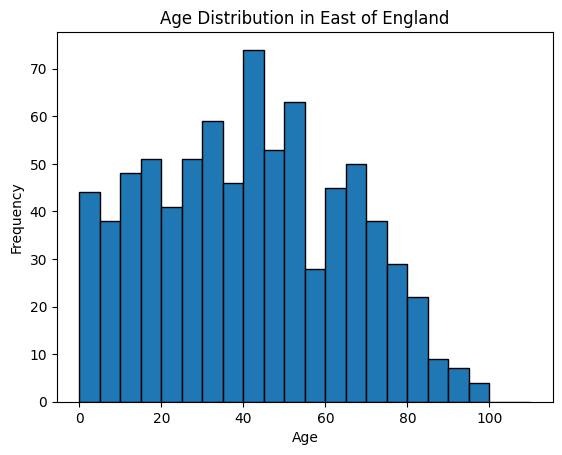

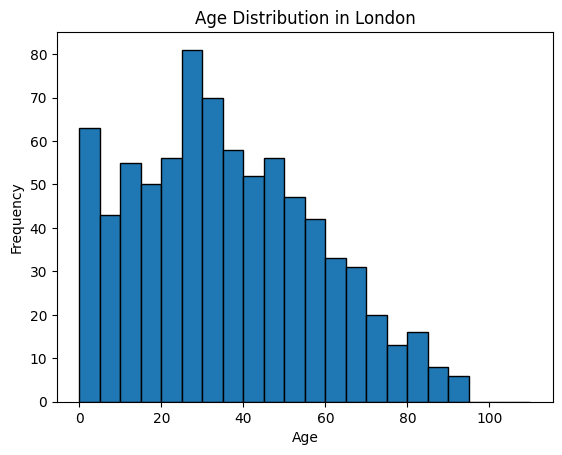

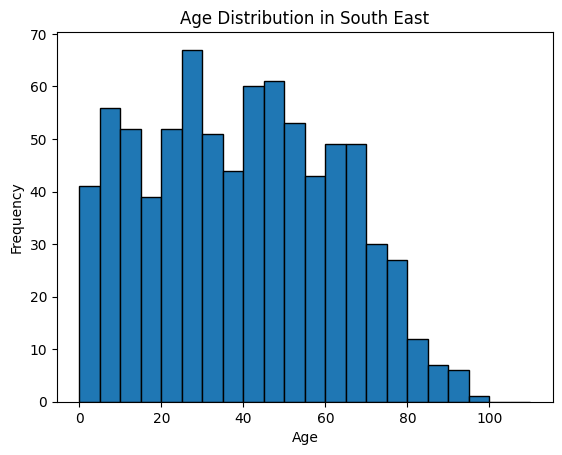

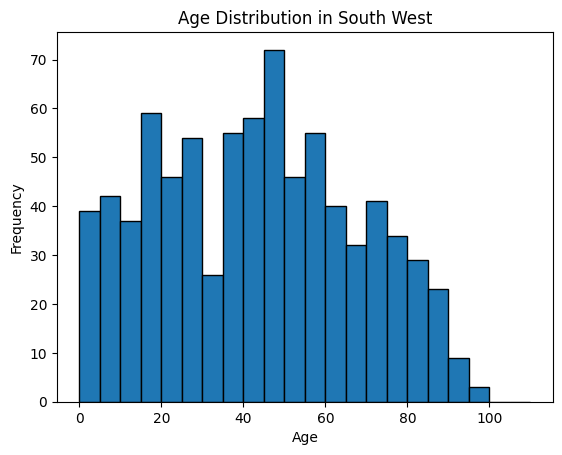

In [54]:
# Measure descriptive statistics of sample_explore
desc_stats = sample_explore.describe()
print(desc_stats)

#-------Box Plots----------
# Define a list of all region names
regions = ['North East', 'North West', 'Yorkshire and The Humber', 'East Midlands', 'West Midlands',
           'East of England', 'London', 'South East', 'South West']

# Create a list to hold the age data for each region
age_data = [sample_explore[region].values for region in regions]

# Create a horizontal box plot of age data for each region
fig, ax = plt.subplots(figsize=(8,6))
ax.boxplot(age_data, vert=False)

# Add labels to the plot
ax.set_title('Age Distribution by Region')
ax.set_xlabel('Age')
ax.set_yticklabels(regions)

plt.show()

#-------Histograms Age Distribution----------

# Loop through each region and generate a histogram of ages
for region in regions:
    # Select the column for the current region
    age_col = sample_explore[region]
    
    # Define the histogram bins and plot the histogram, width of 5
    bins = range(0, 115, 5)
    plt.hist(age_col, bins=bins, edgecolor='black')
    
    # Add axis labels and a title
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title(f'Age Distribution in {region}')
    
    # Show the histogram
    plt.show()

## State your hypothesis, and state the evidence that justifies it. (2 marks)

Hypothesis: The London region has a younger population compared to other regions.

Evidence: The mean age of the London region (35.663750) is lower than the mean age of all other regions (North East, North West, Yorkshire and The Humber, East Midlands, West Midlands, East of England, South East, and South West). Additionally, the 25th percentile age in London (19) is lower than the 25th percentile age in most other regions. London also has the lowest maximum age of all other regions (94).This suggests that there may be a significant difference in the age distribution of the London region compared to other regions, which supports the hypothesis that the London region has a younger population.

## Plan the test. (3 marks)

In [55]:
# sample_test descriptive statistics
desc_stats = sample_test.describe()
regions = ['North East', 'North West', 'Yorkshire and The Humber', 'East Midlands', 'West Midlands', 'East of England', 'South East', 'South West']
total = 0

for region in regions:
    mean_age = desc_stats.loc['mean', region]
    total += mean_age
    
mean = total / 8

To test the hypothesis, we can use a one tailed z-test at the 95% probability level. We will use the sample_test to carry out our calculations.

The mean age of the other regions is the sum of the means of the regions from the descriptive statistics divided by 8. (Calculated above)

Null Hypothesis (H0): µ = 41.11 (The mean age of London is not different to the mean age of the other regions from sample_test, mean is calculcated above)

Alternative Hypothesis (H1): µ < 41.11 (The mean age of London is less than the mean age of the other regions from sample_test, mean is calculcated above)

From the sample_test dataset, we have the mean age of people in London to be 36.94 (2dp) obtained from desc_stats.

To carry out this hypothesis test, we will first need to find the z-value which can be compared with the critical value. The formula for the z-value is: z = (m - k) / (s / sqrt(n)) where m = mean, k = value of m being compared to, s = empirical standard devaiation, n = number of data points. We will then compare this z-value to the critical value to determine the validity of the hypothesis.

## Perform the statistical test of the hypothesis. (5 marks)

Null Hypothesis (H0): µ = 41.11 (The mean age of London is not different to the mean age of the other regions from sample_test)

Alternative Hypothesis (H1): µ < 41.11 (The mean age of London is less than the mean age of the other regions from sample_test)

From the sample_test dataset, we have the mean age of people in London to be 36.94 (2dp).

In [56]:
import numpy as np
from scipy.stats import norm

# Calculate empircal standard deviation of sample_test
# combine all the age columns into a single array
age_data = np.concatenate((df['North East'], df['North West'], df['Yorkshire and The Humber'], df['East Midlands'], df['West Midlands'], df['East of England'], df['London'], df['South East'], df['South West']))

# calculate the mean and variance of the age data
mean_age = np.mean(age_data)
var_age = np.sum((age_data - mean_age) ** 2) / (len(age_data) - 1)

# calculate the empirical standard deviation
empirical_sd = np.sqrt(var_age)

In [60]:
# Assigining values to calulcate z-value:  z = (m - k) / (s / sqrt(n))
m = desc_stats.loc['mean', "London"] # Mean age of London region
k = 41.11 # Given,  this is µ
s = empirical_sd # Calculated above
n = 200 # 200 datapoints in sample_test

# Using formula
z_score = (m - k) / (s / np.sqrt(n))

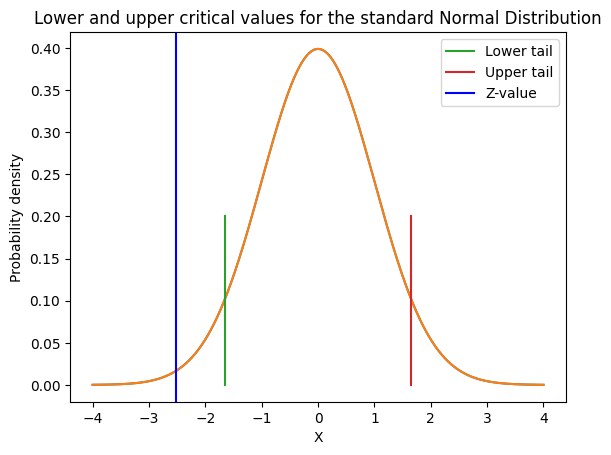

In [61]:
# We now need to find the critical value of the standardised normal distribution with µ = 0 and σ = 1
# First plotting the standardised normal distribution 
# We are only interested in the lower tail crtical value as this is a one tail test. However, I still decided to plot the upper tail crtical value.

# Generate some data for the x-axis
x = np.linspace(-4, 4, 1000)

# Calculate the corresponding y-values for the standard normal distribution
y = norm.pdf(x, 0, 1) # µ = 0 and σ = 1 

# Plot the standard normal distribution
plt.plot(x, y)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Probability density')
plt.title('Standard normal distribution')

alpha = 0.05 # 95% probability level 
lower = stats.norm.ppf(alpha, 0, 1)
upper = stats.norm.ppf(1 - alpha, 0, 1)
plt.plot(x,y)
plt.plot([lower,lower], [0,0.2], label = "Lower tail")
plt.plot([upper,upper], [0,0.2], label = "Upper tail")

plt.title("Lower and upper critical values for the standard Normal Distribution")

# Plot the z-value as a vertical line
plt.axvline(z_score, color='b', label='Z-value'.format(z_score))
plt.legend()

# Show the plot
plt.show()

From the plot, it is clear that the z-score of -2.52 falls below the lower tail critical value at the 95% probability level. This provides evidence to reject the Null Hypothesis, consistent with our Alternative Hypothesis. 

## Conclusions. (2 Marks) 

Using the Z-test, I have found sufficient evidence to reject the null hypothesis at the 95% level. This indicates that there is a significant difference between the age of population in the London region compared to other regions. Based on the results, we can conclude that the London region has a younger population than other regions.